## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [2]:
!pip install pandas_datareader

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа №5

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [3]:
av_ratings = np.load('average_ratings.npy')
av_ratings

array([[ 5.        ,  5.01310274,  5.02623981, ...,  5.52281922,
         5.53729203,  5.52281922],
       [ 7.        ,  6.97074954,  7.        , ..., 10.        ,
        10.        , 10.        ],
       [ 3.        ,  2.9968611 ,  2.99372548, ...,  2.99372548,
         2.99059315,  2.98746409]])

In [4]:
from datetime import datetime
a = datetime.strptime('01.01.2019', '%d.%m.%Y')
b = datetime.strptime('30.12.2021', '%d.%m.%Y')
for_range = (b-a).days+1

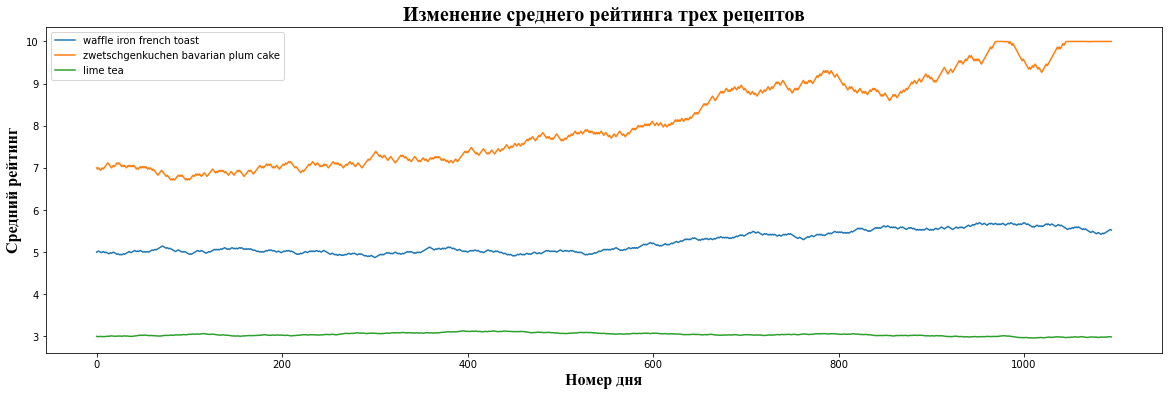

In [5]:
fig, ax = plt.subplots(figsize=(20, 6))

d_recipes = {0: 'waffle iron french toast',
             1: 'zwetschgenkuchen bavarian plum cake',
             2: 'lime tea'}
for i in range(len(d_recipes.keys())):
    ax.plot([el for el in range(for_range)], 
             av_ratings[i], 
             label = d_recipes[i]
            )

ax.legend()
ax.set_xlabel('Номер дня', 
           {'fontname':'Times New Roman'}, 
           fontweight='bold', 
           fontsize=16
          )
ax.set_ylabel('Средний рейтинг', 
           {'fontname':'Times New Roman'}, 
           fontweight='bold', 
           fontsize=16
          )
ax.set_title('Изменение среднего рейтинга трех рецептов', 
           {'fontname':'Times New Roman'}, 
           fontweight='bold', 
           fontsize=20
         )

plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


In [6]:
begin = '01.01.2019'
end = '30.12.2021'
dates = pd.date_range(begin, end)
dates = [pd.to_datetime(date, format='%d.%m.%Y').date() for date in dates]
dates

[datetime.date(2019, 1, 1),
 datetime.date(2019, 1, 2),
 datetime.date(2019, 1, 3),
 datetime.date(2019, 1, 4),
 datetime.date(2019, 1, 5),
 datetime.date(2019, 1, 6),
 datetime.date(2019, 1, 7),
 datetime.date(2019, 1, 8),
 datetime.date(2019, 1, 9),
 datetime.date(2019, 1, 10),
 datetime.date(2019, 1, 11),
 datetime.date(2019, 1, 12),
 datetime.date(2019, 1, 13),
 datetime.date(2019, 1, 14),
 datetime.date(2019, 1, 15),
 datetime.date(2019, 1, 16),
 datetime.date(2019, 1, 17),
 datetime.date(2019, 1, 18),
 datetime.date(2019, 1, 19),
 datetime.date(2019, 1, 20),
 datetime.date(2019, 1, 21),
 datetime.date(2019, 1, 22),
 datetime.date(2019, 1, 23),
 datetime.date(2019, 1, 24),
 datetime.date(2019, 1, 25),
 datetime.date(2019, 1, 26),
 datetime.date(2019, 1, 27),
 datetime.date(2019, 1, 28),
 datetime.date(2019, 1, 29),
 datetime.date(2019, 1, 30),
 datetime.date(2019, 1, 31),
 datetime.date(2019, 2, 1),
 datetime.date(2019, 2, 2),
 datetime.date(2019, 2, 3),
 datetime.date(2019, 2, 4)

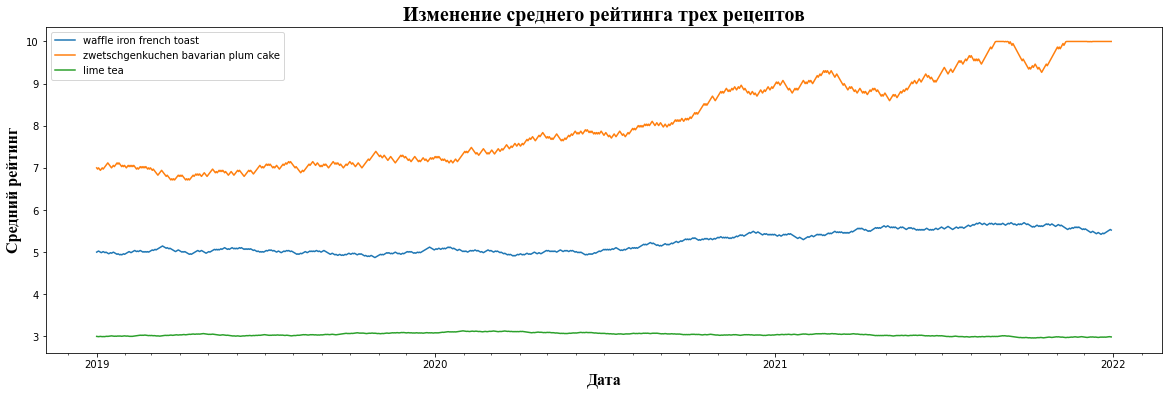

In [7]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(20, 6))

d_recipes = {0: 'waffle iron french toast',
             1: 'zwetschgenkuchen bavarian plum cake',
             2: 'lime tea'}
for i in range(len(d_recipes.keys())):
    ax.plot(dates, 
             av_ratings[i], 
             label = d_recipes[i]
            )

ax.legend()
ax.set_xlabel('Дата', 
           {'fontname':'Times New Roman'}, 
           fontweight='bold', 
           fontsize=16
          )
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval = 1))

ax.set_ylabel('Средний рейтинг', 
           {'fontname':'Times New Roman'}, 
           fontweight='bold', 
           fontsize=16
          )
ax.set_title('Изменение среднего рейтинга трех рецептов', 
           {'fontname':'Times New Roman'}, 
           fontweight='bold', 
           fontsize=20
         )

plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

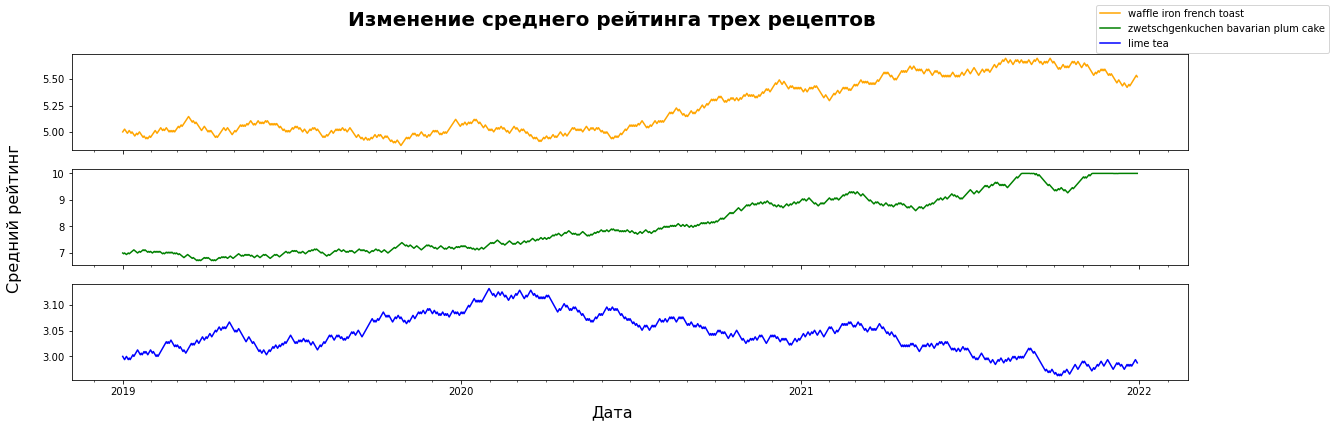

In [8]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize=(20, 6), sharex=True)

d_recipes = {0: 'waffle iron french toast',
             1: 'zwetschgenkuchen bavarian plum cake',
             2: 'lime tea'}

lst_color = ['orange', 'green', 'blue']
for i in range(len(d_recipes.keys())):
    axes[i].plot(dates,
                 av_ratings[i], 
                 label = d_recipes[i], 
                 color = lst_color[i]
            )
    axes[i].xaxis.set_minor_locator(mdates.MonthLocator(interval = 1))
    
    axes[i].xaxis.set_major_locator(mdates.YearLocator())
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


fig.legend()
fig.text(0.5, 0.04, 'Дата', ha='center', fontsize = 16)
fig.text(0.08, 0.5, 'Средний рейтинг', va='center', rotation='vertical', fontsize = 16)

fig.suptitle('Изменение среднего рейтинга трех рецептов', 
               fontweight='bold', 
               fontsize=20
             )

plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [9]:
visitors = np.load('visitors.npy')
visitors

array([2311, 2023, 1839, 1523, 1371, 1217, 1098,  958,  862,  724,  654,
        558,  526,  454,  383,  372,  356,  274,  239,  236,  214,  179,
        180,  140,  138,  112,  102,  101,   74,   81,   70,   74,   53,
         57,   52,   44,   38,   30,   37,   27,   20,   21,   16,   16,
         12,    9,   13,   10,   13,    7,    5,    8,    6,    8,    9,
          4,    3,    4,    4,    2,    2,    3,    2,    2,    2,    2,
          2,    3,    2,    2,    3,    2,    2,    2,    2,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2])

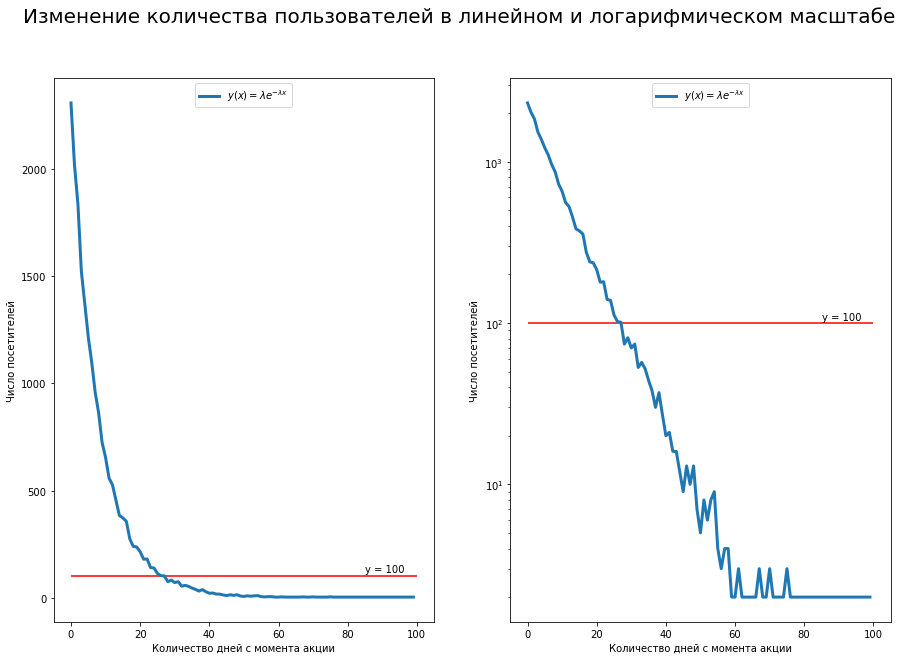

In [10]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 10))

axes[0].plot([i for i in range(100)], visitors, linewidth = 3, 
             label = r'$y(x) = \lambda e^{-\lambda x}$')
axes[0].legend(loc = 'upper center')
axes[0].hlines(100, 0, 100, color = 'red')
axes[0].text(85,120,"y = 100")
axes[0].set_ylabel('Число посетителей')
axes[0].set_xlabel('Количество дней с момента акции')

axes[1].set_yscale("log")
axes[1].plot([i for i in range(100)], visitors, linewidth = 3, 
             label = r'$y(x) = \lambda e^{-\lambda x}$')
axes[1].legend(loc = 'upper center')
axes[1].hlines(100, 0, 100, color = 'red')
axes[1].text(85,105,"y = 100")
axes[1].set_ylabel('Число посетителей')
axes[1].set_xlabel('Количество дней с момента акции')

fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе', fontsize = 20)

plt.show()

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [11]:
recipes = pd.read_csv('recipes_sample.csv')
recipes['submitted'] = pd.to_datetime(recipes['submitted'], format = '%Y-%m-%d')

reviews = pd.read_csv('reviews_sample.csv', index_col = 0)
reviews['date'] = pd.to_datetime(reviews['date'], format = '%Y-%m-%d')

In [12]:
recipes.head(2)

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN


In [13]:
reviews.head(2)

,user_id,recipe_id,date,rating,review
370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [14]:
def check_type(row):
    if row['minutes'] >= 50:
        return 'Длинные'
    elif row['minutes'] < 5:
        return 'Короткие'
    else:
        return 'Средние'

In [15]:
recipes['type'] = recipes.apply(check_type, axis=1)

In [16]:
# Размер групп
df_grouped_types = recipes.groupby('type')['id'].count()
df_grouped_types

type
Длинные     11718
Короткие      675
Средние     17607
Name: id, dtype: int64

In [17]:
# Среднее кол-во шагов в рецептах
df_grouped_n_steps = recipes.groupby('type')['n_steps'].mean()
df_grouped_n_steps

type
Длинные     11.917290
Короткие     4.990431
Средние      8.581922
Name: n_steps, dtype: float64

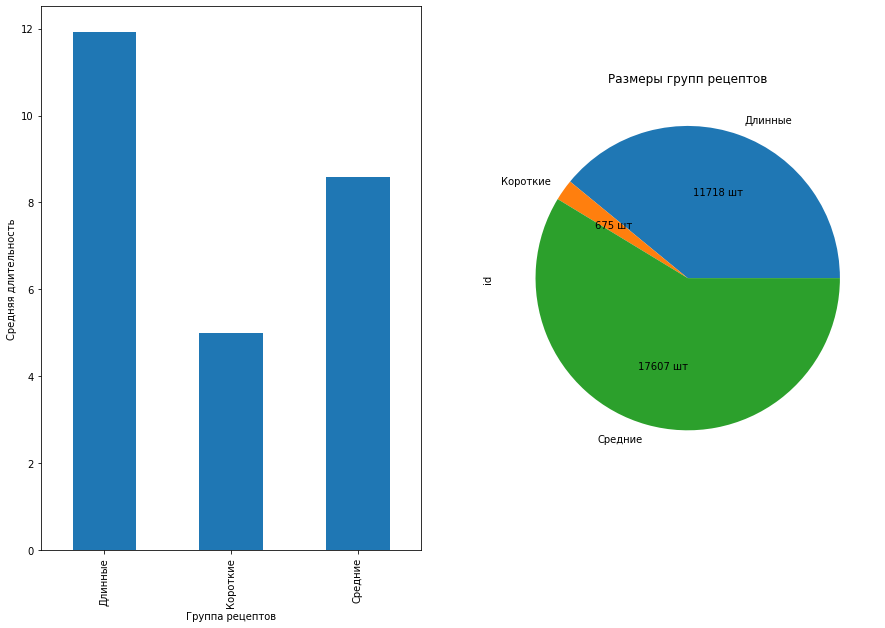

In [18]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 10))

df_grouped_n_steps.plot.bar(ax=axes[0])
axes[0].set_ylabel('Средняя длительность')
axes[0].set_xlabel('Группа рецептов')

df_grouped_types.plot.pie(ax=axes[1],
                          autopct =lambda p:f'{p*sum(df_grouped_types)/100 :.0f} шт',
                          title='Размеры групп рецептов')

plt.show()

### То же самое, но если удалить nan:

In [92]:
recipes_2 = recipes.dropna(subset=['minutes', 'n_steps'])

In [93]:
recipes_2['type'] = recipes_2.apply(check_type, axis=1)

<ipython-input-93-c9a5024cdf86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes_2['type'] = recipes_2.apply(check_type, axis=1)


In [94]:
recipes_2

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,type
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN,Средние
6,open sesame noodles,107229,28,173674,2004-12-30,8.0,this is a very versatile and widely enjoyed pa...,12.0,Средние
7,say what banana sandwich,95926,5,118163,2004-07-20,4.0,you just have to try it to believe it.,NaN,Средние
8,1 in canada chocolate chip cookies,453467,45,1848091,2011-04-11,12.0,this is the recipe that we use at my school ca...,11.0,Средние
9,412 broccoli casserole,306168,40,50969,2008-05-30,6.0,since there are already 411 recipes for brocco...,NaN,Средние
...,...,...,...,...,...,...,...,...,...
29989,zucchini cheddar casserole,74023,50,89831,2003-10-24,14.0,this has been a long time family favorite!,8.0,Длинные
29992,zucchini courgette soup good for weight watc...,415406,45,485109,2010-03-04,5.0,this is a favourite winter warmer. by british ...,NaN,Средние
29994,zuppa by luisa,464576,70,226863,2011-09-20,14.0,this soup is a hearty meal! from luisa musso.,17.0,Длинные
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0,Длинные


In [95]:
# Размер групп
df_grouped_types = recipes_2.groupby('type')['id'].count()
df_grouped_types

type
Длинные      7351
Короткие      418
Средние     11041
Name: id, dtype: int64

In [96]:
# Среднее кол-во шагов в рецептах
df_grouped_n_steps = recipes_2.groupby('type')['n_steps'].mean()
df_grouped_n_steps

type
Длинные     11.917290
Короткие     4.990431
Средние      8.581922
Name: n_steps, dtype: float64

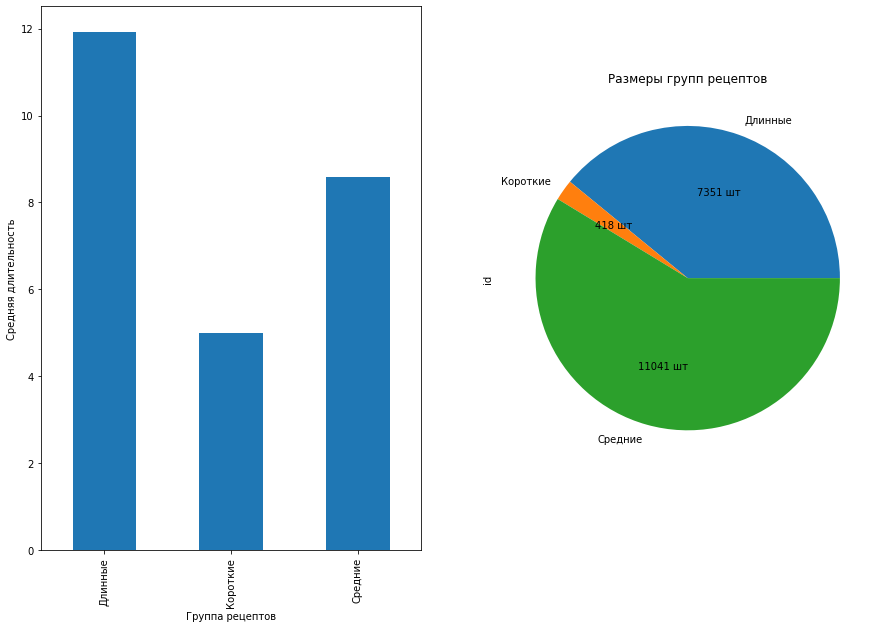

In [97]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 10))

df_grouped_n_steps.plot.bar(ax=axes[0])
axes[0].set_ylabel('Средняя длительность')
axes[0].set_xlabel('Группа рецептов')

df_grouped_types.plot.pie(ax=axes[1],
                          autopct =lambda p:f'{p*sum(df_grouped_types)/100 :.0f} шт',
                          title='Размеры групп рецептов')

plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

In [19]:
rev_08_09 = reviews[(reviews['date'].dt.year == 2008)|(reviews['date'].dt.year == 2009)]
rev_08_09

,user_id,recipe_id,date,rating,review
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
1023302,308434,11252,2008-12-14,5,Oh Bergy! These wonderful little cakes are aw...
264646,151754,285773,2008-09-04,0,"This was a very moist cornbread, even two days..."
126930,379985,150499,2008-08-21,5,I really liked this recipe. It's perfect to ma...
...,...,...,...,...,...
532061,335737,36548,2008-04-22,5,If only there were more stars to give! Normall...
698638,1186693,394518,2009-12-09,0,I must have done something wrong! Mine were v...
344676,724631,314698,2008-10-14,5,"5 Stars, The Hunter said the mushrooms and sau..."
1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...


#### Вариант 1

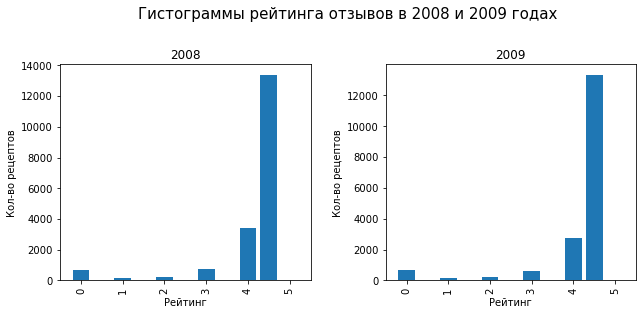

In [74]:
axes = rev_08_09.hist(column='rating', by=rev_08_09['date'].dt.year, rwidth = 0.8, figsize=(10, 4), align = 'left')

plt.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах',
            y = 1.1,
            fontsize=15)
axes[0].set_xlabel('Рейтинг')
axes[0].set_ylabel('Кол-во рецептов')
axes[0].set_xticks(range(6))
axes[0].set_xlim(-0.5, 5.5)

axes[1].set_xlabel('Рейтинг')
axes[1].set_ylabel('Кол-во рецептов')
axes[1].set_xticks(range(6))
axes[1].set_xlim(-0.5, 5.5)


plt.show()
#Да, самый правый съехал, но я все перепробовала...
#Часть функционала не доступна из-за использования df.hist

#### Вариант 2

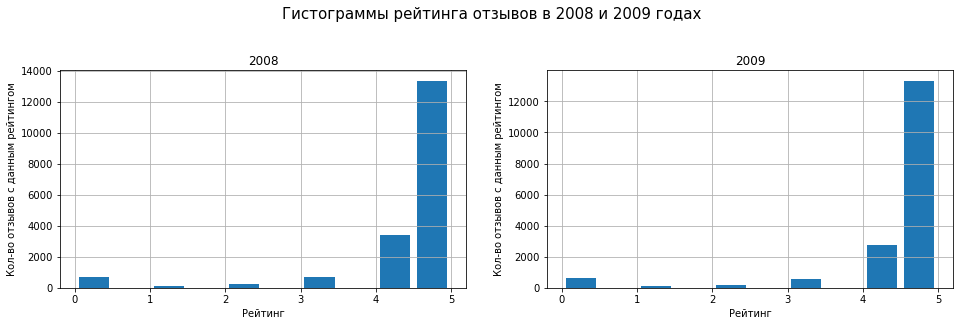

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))

r_2008 = rev_08_09[rev_08_09['date'].dt.year == 2008].rating.hist(ax=axes[0], rwidth=0.8).set_title('2008')
axes[0].set_xlabel('Рейтинг')
axes[0].set_ylabel('Кол-во отзывов с данным рейтингом')

r_2009 = rev_08_09[rev_08_09['date'].dt.year == 2009].rating.hist(ax=axes[1], rwidth=0.8).set_title('2009')
axes[1].set_xlabel('Рейтинг')
axes[1].set_ylabel('Кол-во отзывов с данным рейтингом')

plt.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах',
            y = 1.1,
            fontsize=15)

plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

In [22]:
recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,type
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,Длинные
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,Средние
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0,Средние
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN,Средние
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN,Средние
...,...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0,Длинные
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0,Длинные
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN,Длинные
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN,Длинные


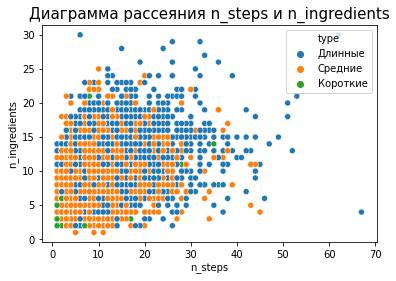

In [23]:
# fig, ax = plt.subplots(figsize=(20, 10))

sns.scatterplot(data = recipes, x='n_steps', y='n_ingredients', hue = 'type')

plt.title("Диаграмма рассеяния n_steps и n_ingredients", fontsize= 15)

plt.show()

#### Вывод: Визуально прямой линейной зависимости не наблюдается. Данные расположены очень кучно, имеются выбросы. Однако, это лишь визуальный анализ, требуется произвести математический анализ.

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

In [24]:
df_6_1 = recipes.merge(reviews, left_on = 'id',
                       right_on = 'recipe_id', 
                       how = 'right')
df_6_1.head(3)

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,type,user_id,recipe_id,date,rating,review
0,salmon with tomatoes,57993,50,52543,2003-04-04,NaN,this savoury dish is very popular in andalusia...,NaN,Длинные,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,lemon cajun stir fry,142201,30,115758,2005-10-21,NaN,yum...this is a family favourite served with s...,11.0,Средние,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,cottage cheese honey and cinnamon on toast,252013,27,182809,2007-09-11,6.0,wow! what a long title for such a quick treat...,4.0,Средние,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."


In [25]:
# Корреляционная матрица
df_6_1[[ "minutes", "n_steps", "n_ingredients", "rating"]].corr()

,minutes,n_steps,n_ingredients,rating
minutes,1.000000,0.030675,-0.006254,-0.025770
n_steps,0.030675,1.000000,0.293526,-0.019057
n_ingredients,-0.006254,0.293526,1.000000,0.003405
rating,-0.025770,-0.019057,0.003405,1.000000


#### Вариант 1

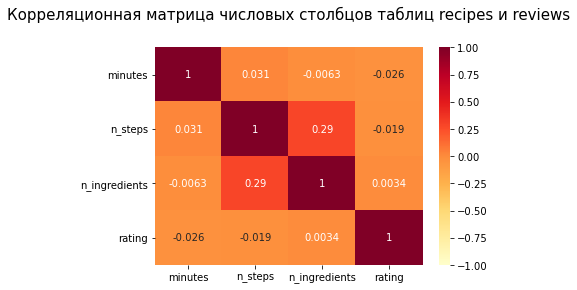

In [26]:
sns.heatmap(df_6_1[[ "minutes", "n_steps", "n_ingredients", "rating"]].corr(), 
            vmin = -1, 
            vmax = +1, 
            annot = True, 
            cmap = 'YlOrRd')

plt.title('Корреляционная матрица числовых столбцов таблиц recipes и reviews', fontsize= 15, y = 1.1)

plt.show()

#### Вариант 2

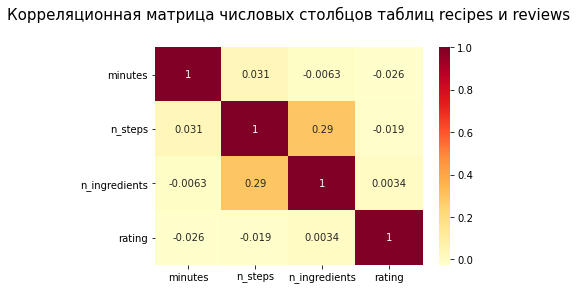

In [27]:
sns.heatmap(df_6_1[[ "minutes", "n_steps", "n_ingredients", "rating"]].corr(), 
            annot = True, 
            cmap = 'YlOrRd')

plt.title('Корреляционная матрица числовых столбцов таблиц recipes и reviews', fontsize= 15, y = 1.1)

plt.show()